# Práctica 3. Bolsas de palabras
Guillermo Segura Gómez

## MEX-A3T: Aggressiveness Analysis

Vamos a utilizar un corpus llamado [MEX-A3T](https://sites.google.com/view/mex-a3t/home?authuser=0) que es un corpus creado en México. MEX-A3T es un corpus hecho para poder medir la agresividad y las fake news. El equipo de CIMAT se dedicó al análisis de identificación de agresividad. 

Lo primero que es necesario hacer es leer los datos del corpus. El corpus incluye datos de entrenamiento asi como etiquetas.

**Keras**

Se introduce la libería **keras**. Keras es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow, Microsoft Cognitive Toolkit o Theano.

Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de Aprendizaje Profundo. Sus fuertes se centran en ser amigable para el usuario, modular y extensible.

**Tensorflow**

Además trabajaremos con la libería **tensorflow**. TensorFlow es una biblioteca de código abierto para aprendizaje automático a través de un rango de tareas, y desarrollado por Google para satisfacer sus necesidades de sistemas capaces de construir y entrenar redes neuronales para detectar y descifrar patrones y correlaciones, análogos al aprendizaje y razonamiento usados por los humanos.

**¿Qué es un tokenizador?**

Recordando el concepto de tokenizador que realizamos en la práctica 2. Un tokenizador es una herramienta que se utiliza para dividir un texto en unidades más pequeñas llamadas tokens. Estos tokens suelen ser palabras, pero también pueden ser caracteres o subpalabras, dependiendo de cómo se configure el tokenizador. El proceso de tokenización es un paso fundamental en muchas tareas de NLP, ya que permite convertir texto no estructurado en una forma que los modelos de machine learning pueden entender y procesar.

Por ejemplo, la frase "Me gusta programar en Python" podría tokenizarse en los tokens ["Me", "gusta", "programar", "en", "Python"].

**Tokenizador de Keras**

El tokenizador `from keras.preprocessing.text import Tokenizer`, es una herramienta que viene con Keras. Este tokenizador realiza precisamente la tarea descrita anteriormente: divide el texto en tokens y puede convertir estos tokens en secuencias de números, lo que los hace útiles para entrenar modelos de deep learning.

Sin embargo, este componente ahora forma parte de TensorFlow, bajo `tf.keras.preprocessing.text.Tokenizer`. Desde que TensorFlow absorbió Keras como su API de alto nivel, la mayoría de las herramientas de Keras se acceden a través del módulo `tf.keras`.

**Tokenizador de TensorFlow**

El tokenizador que encontraste en TensorFlow (`tf.keras.preprocessing.text.Tokenizer`) funciona de manera muy similar al tokenizador original de Keras. Aquí tienes una descripción de los parámetros que mencionaste:

- `num_words`: El número máximo de palabras que se guardarán, basado en la frecuencia de palabra. Solo las `num_words` más comunes serán retenidas.
- `filters`: Una cadena en la que cada elemento es un carácter que se filtrará del texto. Es decir, estos caracteres serán ignorados durante la tokenización.
- `lower`: Un booleano que indica si se debe convertir el texto a minúsculas.
- `split`: El carácter que se utilizará como delimitador para dividir el texto en tokens.
- `char_level`: Si es True, cada carácter será tratado como un token.
- `oov_token`: Un valor que se asignará a los tokens fuera del vocabulario (palabras que no se han visto durante el entrenamiento).
- `analyzer`: Este parámetro no está documentado en la versión estándar de TensorFlow y podría no ser aplicable.

Para utilizar este tokenizador, primero instancias el objeto `Tokenizer` con los parámetros que desees y luego lo ajustas a tus textos utilizando el método `.fit_on_texts(texts)`. Después de ajustarlo, puedes usar `.texts_to_sequences(texts)` para convertir tus textos en secuencias de números, que son los índices de los tokens en el vocabulario del tokenizador.

In [40]:
import tensorflow as tf

In [7]:
# Instanciando el tokenizador
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)

# Ejemplo de texto
texts = ["Me gusta programar en Python", "Python es genial para machine learning"]

# Ajustando el tokenizador en los textos
tokenizer.fit_on_texts(texts)

# Convirtiendo textos a secuencias de tokens
sequences = tokenizer.texts_to_sequences(texts)

print(sequences)

[[2, 3, 4, 5, 1], [1, 6, 7, 8, 9, 10]]


Ahora trabajaremos con los archivos del corpus MEX-A3T, necesitamos una función que lea los archivos del corpus y nos regrese el texto en una lista.

In [34]:
def get_text_from_file(path_corpus, path_truth):

    tr_text = []
    tr_labels = []

    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_text += [tweet]
        for label in f_truth:
            tr_labels += [label]

    return tr_text, tr_labels

In [35]:
path_text = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MexData/mex20_train.txt"
path_labels = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MexData/mex20_train_labels.txt"

tr_text, tr_labels = get_text_from_file(path_text, path_labels)

In [36]:
tr_text[:5]

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n']

In [37]:
tr_labels[:5]

['1\n', '0\n', '1\n', '1\n', '0\n']

El contenido de los arreglos es la información encontrada en el corpus de entrenamiento. En el arreglo **tr_text** encontramos el texto de los tweets, mientras que en el arreglo **tr_labels** está la etiqueta de si es agresivo o no es agresivo.

## Estadísticas Simples

Vamos a realizar una inspección de los datos, esto con el propósito de observar cuantos datos hay. Podemos utilizar la libería matplotlib para este fin. Además utilizamos un contador de la librería counter. Vamos a contar las etiquetas del data set y construimos un histograma. 

Counter({'0\n': 3759, '1\n': 1519})


Text(0.5, 0, 'Class')

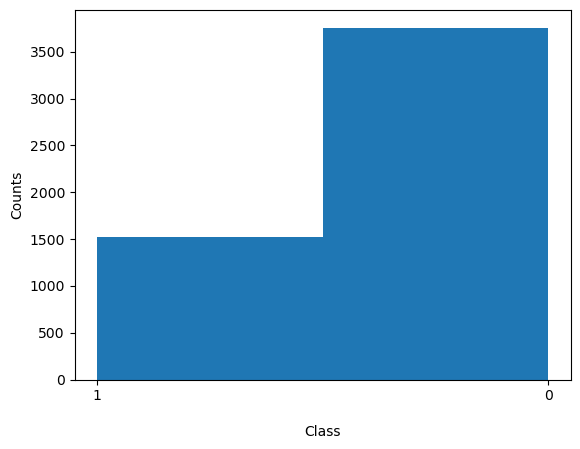

In [39]:
from collections import Counter
import matplotlib.pyplot as plt 

print(Counter(tr_labels))

plt.hist(tr_labels, bins=len(set(tr_labels)))
plt.ylabel("Counts")
plt.xlabel("Class")

Hay mas contenido que no es agresivo, mas del doble.

## Construcción del vocabulario

Ahora vamos a constuir el vocabulario utilizando el método de **TweetTokenizer** de la clase *tokenize* de la librería nltk.

In [48]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer() # Inicializar tokenizer

In [49]:
corpus_palabras = []

for doc in tr_text:
    corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [127]:
print(f"El tamaño del corpus es:", len(corpus_palabras))
print(f"El tamaño del vocabulario es:", len(fdist))

El tamaño del corpus es: 97473
El tamaño del vocabulario es: 15194


In [121]:
corpus_palabras[:10]

['@USUARIO',
 '@USUARIO',
 '@USUARIO',
 'Q',
 'se',
 'puede',
 'esperar',
 'del',
 'maricon',
 'de']

In [129]:
fdist

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

La construcción de la bolsa de palabras en esta práctica se realiza a mano. Existen algunas librerias de Machine Learning que realizan este proceso, sin embargo no permiten determinar el total de información, ya que se pierden algunos detalles en el procesamiento.

Ahora necesitamos ordenar las frecuencias del vocabulario para poder trabajar con el.

In [64]:
def  SortFrecuency(freqdist):
    # List comprenhension
    aux = [(freqdist[key], key) for key in freqdist]
    aux.sort() # Ordena la lista
    aux.reverse() # Cambiar el orden

    return aux

In [130]:
voc = SortFrecuency(fdist)
voc = voc[:5000]
voc[:5]

[(3016, ','), (2915, 'de'), (2829, 'que'), (2604, '.'), (2031, 'la')]

Vamos a trabajar únicamente con los 5 mil términos mas comunes. Esto por simplicidad. Vamos a trabajar con un diccionario de python. Es bastante útil si podemos lograr tener la {palabra, valor} en donde el valor se refiere al índice de palabra o el lugar donde se encuentra, siendo 1 la palabra mas frecuente y 5000 la palabra menos frecuente, es decir estamos creando un diccionario que accesa a la palabra en función de su lugar en el vector. Además el diccionario tiene un orden de acceso bástante rápido ya que es una tabla hash.

In [70]:
dict_indices = dict()
count = 0

for weight, word in voc:
    dict_indices[word] = count
    count += 1

dict_indices

{',': 0,
 'de': 1,
 'que': 2,
 '.': 3,
 'la': 4,
 'a': 5,
 'y': 6,
 '!': 7,
 'no': 8,
 '@USUARIO': 9,
 'me': 10,
 'el': 11,
 'en': 12,
 'se': 13,
 'es': 14,
 'con': 15,
 '?': 16,
 'verga': 17,
 'los': 18,
 'madre': 19,
 'por': 20,
 'las': 21,
 '"': 22,
 'un': 23,
 'te': 24,
 'mi': 25,
 'lo': 26,
 'putas': 27,
 'una': 28,
 '...': 29,
 'putos': 30,
 'para': 31,
 '😂': 32,
 'si': 33,
 'ya': 34,
 'como': 35,
 'su': 36,
 'pero': 37,
 'tu': 38,
 'loca': 39,
 'le': 40,
 'más': 41,
 'No': 42,
 'del': 43,
 'gorda': 44,
 'al': 45,
 'bien': 46,
 'A': 47,
 '¿': 48,
 'Y': 49,
 'son': 50,
 'Me': 51,
 'o': 52,
 'feas': 53,
 'cuando': 54,
 'Que': 55,
 ':': 56,
 'yo': 57,
 'les': 58,
 'porque': 59,
 'ni': 60,
 'está': 61,
 'ser': 62,
 'estoy': 63,
 'sus': 64,
 'todos': 65,
 'esta': 66,
 'puta': 67,
 'Ya': 68,
 'todo': 69,
 'pinche': 70,
 'puto': 71,
 'tan': 72,
 'Si': 73,
 'La': 74,
 'qué': 75,
 '…': 76,
 'eso': 77,
 'muy': 78,
 'soy': 79,
 'hasta': 80,
 'así': 81,
 '¡': 82,
 '<URL>': 83,
 'mamar': 84,


### Bow con scikit

La bolsa de palabras es un modelo que simplifica el contenido textual al considerar solo la ocurrencia de palabras, ignorando su orden y contexto. En este modelo, un texto se representa como un vector, donde cada dimensión corresponde a una palabra del vocabulario de todos los textos considerados, y el valor en cada dimensión cuenta la frecuencia de esa palabra en el texto.

Para construir una bolsa de palabras en `scikit-learn`, se puede usar la clase `CountVectorizer`:

1. **Importar `CountVectorizer`**: Primero, es necesario importar la clase `CountVectorizer` de `sklearn.feature_extraction.text`.

2. **Instanciar `CountVectorizer`**: Luego, se crea una instancia de `CountVectorizer`. Se puede personalizar varios parámetros, como `max_features` para limitar el número de palabras en el vocabulario, `stop_words` para excluir palabras comunes que no aportan mucho significado (como "y", "o", "el", etc.), y `ngram_range` para considerar combinaciones de palabras además de palabras individuales.

3. **Ajustar el modelo**: Se ajusta el vectorizador a los documentos de texto con el método `.fit()`, lo que hace que el modelo aprenda el vocabulario.

4. **Transformar textos**: Finalmente, se transforman los documentos de texto en vectores BoW utilizando el método `.transform()`. Esto convierte cada texto en un vector numérico donde cada elemento representa la frecuencia de una palabra del vocabulario en el texto.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# Ejemplo de documentos
documentos = [
    "El aprendizaje automático es fascinante",
    "El procesamiento de lenguaje natural es una parte del aprendizaje automático",
    "Scikit-learn facilita el machine learning"
]

# Instanciar CountVectorizer
vectorizador = CountVectorizer(stop_words='english')

# Ajustar el modelo y transformar los documentos en una bolsa de palabras
bolsa_de_palabras = vectorizador.fit_transform(documentos)

# Convertir la bolsa de palabras a un array para visualizarla
array_bolsa_de_palabras = bolsa_de_palabras.toarray()

# Obtener el vocabulario
vocabulario = vectorizador.get_feature_names_out()

print("Vocabulario:", vocabulario)
print("Bolsa de palabras:\n", array_bolsa_de_palabras)


Vocabulario: ['aprendizaje' 'automático' 'del' 'el' 'es' 'facilita' 'fascinante'
 'learn' 'learning' 'lenguaje' 'machine' 'natural' 'parte' 'procesamiento'
 'scikit' 'una']
Bolsa de palabras:
 [[1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1]
 [0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0]]


## Bolsa de términos

Con la variable **dict_indices** ya podemos crear la bolsa de palabras. Utilizamos la librería numpy para trabajar con vectores. Construimos la bolsa de palabras en una matriz. La bolsa de palabras que construimos tiene un pesado binario.

In [107]:
import numpy as np

def build_bow_tr(tr_text, vocabulary, dict_indices):

    # Construcción de matriz para la bolsa de palabras
    # En cada fila vemos los documentos que estamos procesando
    # En las columnas el tamaño del vocabulario que estamos creando
    BOW = np.zeros((len(tr_text),len(vocabulary)), dtype = int)

    for tr in tr_text:
        # Cada documento tr lo tokenizamos
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))

        # Definimos el contador para cada documento
        cont_doc = 0

        # Contamos cada palabra
        for word in fdist_doc:

            # Nos aseguramos que las palabras estan en el diccionario final de 5mil palabras
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = 1

        cont_doc += 1

    return BOW

In [135]:
BOW_tr = build_bow_tr(tr_text, voc, dict_indices)
BOW_tr[:10][:10]

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
BOW_tr.shape

(5278, 5000)

### Bolsa de palabras de validación

Ahora construimos la bolsa de palabras para los términos de validación. Utilizamos el mismo vocabulario y el mismo diccionario que ya construimos

Counter({0: 418, 1: 169})


Text(0.5, 0, 'Class')

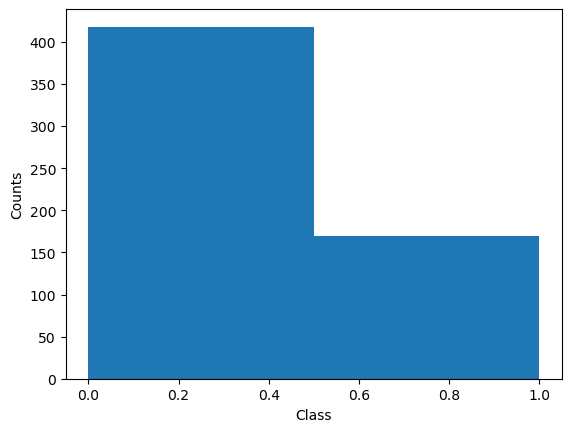

In [110]:
# Cargar los archivos de validación

path_text = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MexData/mex20_val.txt"
path_labels = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/MexData/mex20_val_labels.txt"

val_text, val_labels = get_text_from_file(path_text, path_labels)

# Hacemos una lista de enteros
val_labels = list(map(int, val_labels))

print(Counter(val_labels))

plt.hist(val_labels, bins=len(set(val_labels)))
plt.ylabel("Counts")
plt.xlabel("Class")

In [111]:
BOW_val = build_bow_tr(val_text, voc, dict_indices)

## Clasificación

Un clasificador es un algoritmo que se utiliza en machine learning para asignar una categoría o clase a una instancia de datos basándose en sus características. Los clasificadores se entrenan con un conjunto de datos que ya tiene etiquetas de clase conocidas, en un proceso llamado aprendizaje supervisado. Una vez entrenado, el clasificador puede usarse para predecir la clase de nuevas instancias de datos.

**Clasificador SVM (Máquinas de Vectores de Soporte)**

El clasificador SVM (Support Vector Machine, o Máquinas de Vectores de Soporte en español) es un algoritmo muy popular y potente en el campo del aprendizaje automático. Se utiliza principalmente para problemas de clasificación, pero también puede adaptarse para la regresión.

El objetivo principal de un SVM es encontrar el hiperplano óptimo (en 2D sería una línea, en 3D un plano, y así sucesivamente para dimensiones más altas) que separe las clases de datos con el margen más amplio posible. Este hiperplano se define como el que tiene la mayor distancia a los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte.

**Funcionamiento Básico del SVM**

- **Margen y Vectores de Soporte**: El SVM intenta maximizar el margen entre las clases. Los vectores de soporte son los puntos de datos más cercanos al hiperplano de decisión, y el margen es la distancia entre estos puntos y el hiperplano. Un margen más amplio ofrece mejor generalización, lo que significa que el clasificador tiene mejor capacidad para clasificar correctamente nuevos datos no vistos durante el entrenamiento.

- **Kernel Trick**: Una de las características más poderosas del SVM es su capacidad para operar en espacios de características de alta dimensión utilizando funciones kernel. Esto permite al SVM manejar datos que no son linealmente separables en su espacio original, transformándolos a un espacio de mayor dimensión donde sí lo son. Los kernels más comunes incluyen el lineal, polinomial, y el de base radial (RBF).

- **Problemas de Clasificación y Regresión**: Aunque SVM se utiliza principalmente para la clasificación, se puede adaptar para la regresión (SVR o Support Vector Regression).

**Ejemplo de Uso del SVM en Scikit-learn**

Este código carga el conjunto de datos Iris, filtra para quedarse con dos clases para un problema binario, divide los datos en conjuntos de entrenamiento y prueba, los escala (un paso importante para los algoritmos basados en distancia como SVM), y luego entrena y evalúa un clasificador SVM con un kernel lineal.

Los clasificadores, incluido el SVM, son herramientas esenciales en machine learning y tienen una amplia gama de aplicaciones, desde reconocimiento de imágenes y voz hasta clasificación de textos y más allá.

In [112]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Cargar un conjunto de datos de ejemplo
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Para simplificar, nos quedamos solo con dos clases
X = X[y != 2]
y = y[y != 2]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos para mejorar el rendimiento del SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un clasificador SVM
svm_clf = SVC(kernel='linear')  # Usar el kernel lineal
svm_clf.fit(X_train_scaled, y_train)

# Evaluar el clasificador
accuracy = svm_clf.score(X_test_scaled, y_test)
print(f"Precisión del clasificador SVM: {accuracy}")


Precisión del clasificador SVM: 1.0


In [144]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Para poder ejecutar correctamente la clasificación necesitamos que la lista **tr_labels** sea una lista de enteros y asi tener solo las clases 0 y 1. La lista de validación **tr_val** ya se formateo correctamente a enteros.

In [113]:
tr_labels = list(map(int, tr_labels))

Utilizamos la libería **sklearn** para construir la máquina de soporte vectorial. 

`Scikit-learn` (importado generalmente como `sklearn`) es una biblioteca de Python muy popular para machine learning. Ofrece una amplia gama de algoritmos tanto para aprendizaje supervisado (como clasificación y regresión) como no supervisado (como agrupamiento y reducción de dimensionalidad), junto con herramientas para la selección de modelos, preprocesamiento de datos, evaluación de modelos y muchas otras utilidades.

A continuación, te explico brevemente cada uno de los componentes de `scikit-learn` que mencionaste, enfocándome en cómo se utilizan en el contexto de clasificar una bolsa de palabras:

### 1. `svm`

El módulo `svm` de `scikit-learn` proporciona clases para diferentes tipos de Máquinas de Vectores de Soporte (SVM), que es un conjunto poderoso de algoritmos utilizados para clasificación, regresión y detección de outliers. En el contexto de clasificación de una bolsa de palabras, podrías usar `SVC` (Support Vector Classification) para clasificar textos en diferentes categorías.

In [114]:
from sklearn import svm

# Crear una instancia del clasificador SVM
clf = svm.SVC(kernel='linear')  # El kernel puede ser 'linear', 'poly', 'rbf', 'sigmoid', etc.

# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]


### 2. `model_selection.GridSearchCV`

`GridSearchCV` es una herramienta que te permite encontrar los mejores parámetros para tu modelo de forma automatizada. Realiza una búsqueda exhaustiva sobre los parámetros especificados de un modelo para encontrar la combinación que da los mejores resultados de acuerdo con una métrica de evaluación determinada.

In [115]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de parámetros para la búsqueda
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'gamma': [1, 0.1, 0.01, 0.001],  # Parámetro para el kernel 'rbf'
    'kernel': ['rbf', 'linear']  # Tipo de kernel
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Ejecutar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor clasificador
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

### 3. `metrics`

El módulo `metrics` incluye una variedad de funciones de puntuación, métricas de pérdida y utilidades para medir el rendimiento de tu modelo. Estas métricas son cruciales para evaluar qué tan bien tu modelo está clasificando los datos.

- **`accuracy_score`**: Mide la precisión general del modelo, es decir, la proporción de predicciones correctas.
- **`confusion_matrix`**: Proporciona una matriz que muestra las clasificaciones correctas e incorrectas entre las clases reales y las predichas.
- **`f1_score`**: Es una medida que combina la precisión y la exhaustividad (recall) para dar una sola puntuación que balancea ambas.
- **`precision_recall_fscore_support`**: Calcula la precisión, la exhaustividad, el puntaje F1 y el soporte para cada clase.
- **`roc_auc_score`**: Mide el área bajo la curva ROC (Receiver Operating Characteristic), que es útil para evaluar la calidad de las predicciones de un clasificador en términos de su capacidad para distinguir entre clases.

Ejemplo de uso:

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Precisión
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred, average='binary')  # 'average' puede ser 'micro', 'macro', 'weighted', dependiendo del problema

print(f"Precisión: {accuracy}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"F1 Score: {f1}")

Precisión: 1.0
Matriz de Confusión:
[[17  0]
 [ 0 13]]
F1 Score: 1.0


Cada una de estas funciones y clases de `scikit-learn` es muy poderosa y puede ser personalizada de muchas maneras para adaptarse a las necesidades específicas de tu problema de clasificación. Es importante experimentar con diferentes configuraciones y evaluar tu modelo con varias métricas para obtener una comprensión completa de su rendimiento.

Si ahora aplicamos esto a nuestro modelo:

In [117]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score

Queremos ajustar el parámetro $c$ de complejidad. Utilizamos GridSearchCV para esto

In [118]:
parameters = {'C': [0.05, .12, .25, .5, 1, 2, 4]}

# Máquina de soporte vectorial
srv = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=srv, param_grid=parameters, n_jobs = 8, scoring = "f1_macro",cv = 5)

# Hacer la búsqueda sobre la bolsa de palabras
grid.fit(BOW_tr, tr_labels)

y_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(val_labels, y_pred, average="macro", pos_label = 1)
print(metrics.classification_report(val_labels, y_pred))

/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expli

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       418
           1       1.00      0.01      0.01       169

    accuracy                           0.71       587
   macro avg       0.86      0.50      0.42       587
weighted avg       0.80      0.71      0.60       587



/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Este informe de clasificación muestra las métricas de rendimiento de un clasificador SVM que se ha entrenado y probado en un conjunto de datos de tweets, donde se intenta predecir si un tweet es agresivo (clase 1) o no agresivo (clase 0). A continuación, interpretación:

### Por Clase:

- **Clase 0 (No agresivo)**:
  - **Precision**: La precisión es del 71%, lo que significa que, de todas las instancias clasificadas como no agresivas por el modelo, el 71% realmente eran no agresivas.
  - **Recall**: El recall es del 100%, indicando que el modelo identificó correctamente el 100% de todos los tweets no agresivos en el conjunto de datos.
  - **F1-Score**: El F1-score, que combina precisión y recall en una sola métrica, es del 83%. Un valor alto sugiere un buen equilibrio entre precisión y recall.

- **Clase 1 (Agresivo)**:
  - **Precision**: La precisión es del 100%, lo que significa que todos los tweets que el modelo identificó como agresivos eran realmente agresivos. Sin embargo, esta alta precisión puede ser engañosa debido al muy bajo recall.
  - **Recall**: El recall es extremadamente bajo, solo del 1%, lo que indica que el modelo apenas identificó correctamente los tweets agresivos presentes en el conjunto de datos.
  - **F1-Score**: El F1-score es del 1%, lo cual es muy bajo y refleja el pobre rendimiento del modelo en la detección de tweets agresivos debido al bajo recall.

### Promedios:

- **Accuracy**: La precisión general del modelo es del 71%, lo que significa que el 71% de todas las predicciones realizadas por el modelo fueron correctas. Sin embargo, esta métrica puede ser engañosa en conjuntos de datos desequilibrados donde una clase es mucho más prevalente.

- **Macro Avg**:
  - La precisión macro promedio es del 86%, y el recall macro promedio es del 50%, lo que resulta en un F1-score macro promedio del 42%. El promedio macro trata a todas las clases por igual, sin tener en cuenta el desbalance entre clases. Aunque la precisión macro parece alta, el recall bajo para la clase agresiva reduce significativamente el F1-score macro.

- **Weighted Avg**:
  - La precisión ponderada promedio es del 80%, y el recall ponderada promedio (igual a la precisión general) es del 71%, con un F1-score ponderado promedio del 60%. Estos promedios ponderados tienen en cuenta el soporte (número de instancias) de cada clase, por lo que dan más peso a la clase más prevalente (no agresiva en este caso).

### Interpretación y Consideraciones:

El modelo tiene un excelente rendimiento para identificar tweets no agresivos, pero lucha significativamente para identificar tweets agresivos, como lo demuestra el recall extremadamente bajo para la clase 1. Esto podría deberse a varias razones, como un desequilibrio en el conjunto de datos (mucho más tweets no agresivos que agresivos), características no informativas para la clase agresiva, o la necesidad de ajustar mejor los parámetros del modelo.

Dado el contexto de la clasificación de agresividad en tweets, es crucial mejorar el recall para la clase agresiva sin sacrificar demasiado la precisión, ya que identificar correctamente los tweets agresivos es vital para la aplicación práctica de este modelo.

Para mejorar el rendimiento en la clase agresiva, podrías considerar las siguientes estrategias:
- **Rebalanceo de clases**: Utilizar técnicas como sobremuestreo de la clase minoritaria o submuestreo de la clase mayoritaria.
- **Ingeniería de características**: Desarrollar o seleccionar características más informativas específicas para identificar la agresividad.
- **Ajuste de parámetros**: Continuar ajustando los parámetros del modelo SVM, posiblemente explorando más allá de los valores de `C` proporcionados.
- **Evaluación con otras métricas**: Centrarse en métricas que sean más informativas para conjuntos de datos desequilibrados, como el área bajo la curva ROC (AUC-ROC).

In [105]:
# Ahora vemos la lista de los ejemplos incorrectos

incorrect = []

for e in zip(val_labels, y_pred, range(len(val_labels))):
    if e[0] != e[1]:
        incorrect += [e[2]]

In [106]:
for e in incorrect:
    case = e

    if "madre" in val_text[case].strip():
        print("Texto: ", val_text[case].strip())
        print("Truth: ", val_labels[case])
        print("Pred: ", y_pred[case])

Texto:  Al perro que se te acerque le parto su madre a si de facil
Truth:  1
Pred:  0
Texto:  Por un mega-error escuché parte de una canción de banda y decia "Demosle vuelo a la hilacha" Que putas madres 😂😂 #PenaAjena
Truth:  0
Pred:  1
Texto:  @USUARIO Q gusto m daria q Peru elimine a la Argentina y la concha d la perra mas puta d Argentina la madre d @USUARIO
Truth:  1
Pred:  0
Texto:  @USUARIO Ya m tienen hasta la madre esos maes
Truth:  0
Pred:  1
Texto:  Me caga esa gente a la que le mientas la madre y ni siquiera tienen la decencia de contestar. Putos, les dicen.
Truth:  1
Pred:  0
Texto:  @USUARIO @USUARIO Lo peor es q uds siguen hablando de engañar al pueblo" hijos de su puta madre, pinches políticos de mierda
Truth:  1
Pred:  0
Texto:  Pero un día te voy a tapar el culo mientras te estoy lamiendo la pantunfla a ver si te da una embolia, hija de tu puta madre
Truth:  1
Pred:  0
Texto:  #PorMiCamisetaYo mando a chingar a su reputisima madre al América,  Televisa y Tvazteca ching